# Daten
In der CSV-Datei stecken alle Commits aller GitHub-Repositories, welche ein bestimmtes GitHub-Repository geforkt haben. Diese Daten habe ich per GitHub-API gezogen (das gleiche ginge auch mit einer Reihe von normalen Git-Repositories).

Beim ursprünglichen Repository (https://github.com/authman/DAT210x) handelt es sich um den Code eines Data-Science-Kurses, welche alle paar Wochen gefordert hatte, zu einem bestimmten Zeitpunkt Übungen abzugeben (Achtung: Abgabe über ein Web-Formular, nicht als Commit! Daher ist folgende Analyse nicht 100%ig richtig modelliert).

In [1]:
import pandas as pd
csv_data = pd.read_csv("commits_of_all_repos.csv")
csv_data.head()

,author,author.avatar_url,author.events_url,author.followers_url,author.following_url,author.gists_url,author.gravatar_id,author.html_url,author.id,author.login,...,committer.repos_url,committer.site_admin,committer.starred_url,committer.subscriptions_url,committer.type,committer.url,html_url,parents,sha,url
0,NaN,https://avatars1.githubusercontent.com/u/18032...,https://api.github.com/users/authman/events{/p...,https://api.github.com/users/authman/followers,https://api.github.com/users/authman/following...,https://api.github.com/users/authman/gists{/gi...,NaN,https://github.com/authman,1803297.0,authman,...,https://api.github.com/users/authman/repos,False,https://api.github.com/users/authman/starred{/...,https://api.github.com/users/authman/subscript...,User,https://api.github.com/users/authman,https://github.com/domi65/DAT210x/commit/00ded...,[{'sha': 'c9dbcd9adeac1f50ca3608ab01c01446a6f1...,00dedb8817aadbff7b0296a7790b8d6c8b365516,https://api.github.com/repos/domi65/DAT210x
1,NaN,https://avatars1.githubusercontent.com/u/18032...,https://api.github.com/users/authman/events{/p...,https://api.github.com/users/authman/followers,https://api.github.com/users/authman/following...,https://api.github.com/users/authman/gists{/gi...,NaN,https://github.com/authman,1803297.0,authman,...,https://api.github.com/users/authman/repos,False,https://api.github.com/users/authman/starred{/...,https://api.github.com/users/authman/subscript...,User,https://api.github.com/users/authman,https://github.com/domi65/DAT210x/commit/c9dbc...,[{'sha': '9cb109bc07484cc5198766d1bd99a87f7450...,c9dbcd9adeac1f50ca3608ab01c01446a6f16db4,https://api.github.com/repos/domi65/DAT210x
2,NaN,https://avatars1.githubusercontent.com/u/18032...,https://api.github.com/users/authman/events{/p...,https://api.github.com/users/authman/followers,https://api.github.com/users/authman/following...,https://api.github.com/users/authman/gists{/gi...,NaN,https://github.com/authman,1803297.0,authman,...,https://api.github.com/users/authman/repos,False,https://api.github.com/users/authman/starred{/...,https://api.github.com/users/authman/subscript...,User,https://api.github.com/users/authman,https://github.com/domi65/DAT210x/commit/9cb10...,[{'sha': '36d3bc18dac01b22bc1bbe0c607228806627...,9cb109bc07484cc5198766d1bd99a87f74500bba,https://api.github.com/repos/domi65/DAT210x
3,NaN,https://avatars1.githubusercontent.com/u/18032...,https://api.github.com/users/authman/events{/p...,https://api.github.com/users/authman/followers,https://api.github.com/users/authman/following...,https://api.github.com/users/authman/gists{/gi...,NaN,https://github.com/authman,1803297.0,authman,...,https://api.github.com/users/authman/repos,False,https://api.github.com/users/authman/starred{/...,https://api.github.com/users/authman/subscript...,User,https://api.github.com/users/authman,https://github.com/domi65/DAT210x/commit/36d3b...,[{'sha': '2e1f2df8099a99baddb6757f0f74eab5749c...,36d3bc18dac01b22bc1bbe0c607228806627fb27,https://api.github.com/repos/domi65/DAT210x
4,NaN,https://avatars1.githubusercontent.com/u/18032...,https://api.github.com/users/authman/events{/p...,https://api.github.com/users/authman/followers,https://api.github.com/users/authman/following...,https://api.github.com/users/authman/gists{/gi...,NaN,https://github.com/authman,1803297.0,authman,...,https://api.github.com/users/authman/repos,False,https://api.github.com/users/authman/starred{/...,https://api.github.com/users/authman/subscript...,User,https://api.github.com/users/authman,https://github.com/domi65/DAT210x/commit/2e1f2...,[{'sha': 'f3ac2d018fc74def2b7d6a564b1c93b48a7e...,2e1f2df8099a99baddb6757f0f74eab5749c2185,https://api.github.com/repos/domi65/DAT210x


# Aggregation
Von den ganzen Daten wird nicht viel gebraucht. Lediglich das Datum der Commits sowie die Anzahl der Commits von den "Forkern" (alle GitHub-User außer `authman`, von dem das Root-Repository stammt) sind relevant. Die Commits werden hier ersteinmal täglich zusammengezählt.

In [2]:
%matplotlib inline
csv_data['commit.author.date'] = pd.to_datetime(csv_data['commit.author.date'])
csv_data = csv_data[csv_data['author.login'] != "authman"]
commits_per_time = csv_data.set_index('commit.author.date').resample("D").count()
commits_per_time.head()

,author,author.avatar_url,author.events_url,author.followers_url,author.following_url,author.gists_url,author.gravatar_id,author.html_url,author.id,author.login,...,committer.repos_url,committer.site_admin,committer.starred_url,committer.subscriptions_url,committer.type,committer.url,html_url,parents,sha,url
commit.author.date,,,,,,,,,,,,,,,,,,,,,
2016-08-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,3,3
2016-08-28,0,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,3,3,3,3
2016-08-29,0,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2016-08-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-08-31,0,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,3,3,3,3


# Visualisierung
Aber hier zeige ich nur skizzenhaft, was mit den Daten angestellt werden könnte. Ich erstelle eine Grafik mit der Anzahl der Commits (blaue Linie) sowie den (geschätzten) Abgabeterminen (rote, vertikale Linien) innerhalb des Kurszeitraums.

Damit ist grob ersichtlich, wann die Studierenden an ihren Aufgaben erledigt haben.

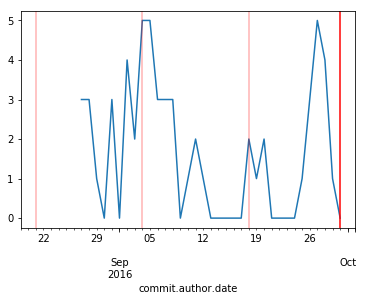

In [3]:
import matplotlib.pyplot as plt

course_end = pd.Timestamp("Sep 30, 2016")
course_start = course_end - pd.DateOffset(weeks=6)
dates = pd.date_range(course_start, course_end, freq="2W", closed="right")
exam_time = commits_per_time[commits_per_time.index <= course_end]

fig, ax = plt.subplots()

ax = exam_time['url'].plot()

for date in dates:
    ax.axvline(date, color="red", alpha=0.3) 

ax.axvline(course_end, color="red") 

plt.show()

Die Daten sowie der Diagrammtyp passen derzeit noch nicht so recht zusammen (hatte ich auf die Schnelle nicht hinbekommen), aber für eine erste Ideenskizze sollte das ausreichen.